<a href="https://colab.research.google.com/github/aacalva/Portafolio/blob/main/KDD_CUP_1999.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librearias a emplearse
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


Preprocesamiento de datos

In [ ]:
# Descargamos el dataset desde el enlace
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"

# Se definen los nombres de las columnas de los datos en una lista llamada column_names
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
                "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
                "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
                "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
                "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
# Cargamos en un dataframe
data = pd.read_csv(url, header=None, names=column_names)
print(data)

        duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0

In [ ]:
# Identificar y gestionar valores faltantes
data = data.replace('?', np.nan)
data = data.dropna()

# Transformar características categóricas a formato numérico

categorical_columns = ["protocol_type", "service", "flag"]
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Estandarizar características numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print(data.head())


   duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0 -0.067792       0.925753 -0.104067  0.514274  -0.002879   0.138664   
1 -0.067792       0.925753 -0.104067  0.514274  -0.002820  -0.011578   
2 -0.067792       0.925753 -0.104067  0.514274  -0.002824   0.014179   
3 -0.067792       0.925753 -0.104067  0.514274  -0.002840   0.014179   
4 -0.067792       0.925753 -0.104067  0.514274  -0.002842   0.035214   

       land  wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0 -0.006673        -0.04772 -0.002571 -0.044136  ...           -1.694315   
1 -0.006673        -0.04772 -0.002571 -0.044136  ...           -1.600011   
2 -0.006673        -0.04772 -0.002571 -0.044136  ...           -1.505707   
3 -0.006673        -0.04772 -0.002571 -0.044136  ...           -1.411403   
4 -0.006673        -0.04772 -0.002571 -0.044136  ...           -1.317100   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                0.599396               -0.282867   
1   

In [ ]:
# Definir el número de clusters
k = 8

# Inicializar el modelo K-means
kmeans = KMeans(n_clusters=k, random_state=42)


Entrenamiento del modelo

In [ ]:
# Entrenar el modelo
kmeans.fit(data.drop("label", axis=1))

# Asignar los clusters a los datos
data['cluster'] = kmeans.labels_

# Interpreta los grupos resultantes para identificar patrones anómalos
print(data['cluster'].value_counts())




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
1    280914
2     90936
0     86875
4     28125
7      6430
3       685
6        50
5         6
Name: count, dtype: int64


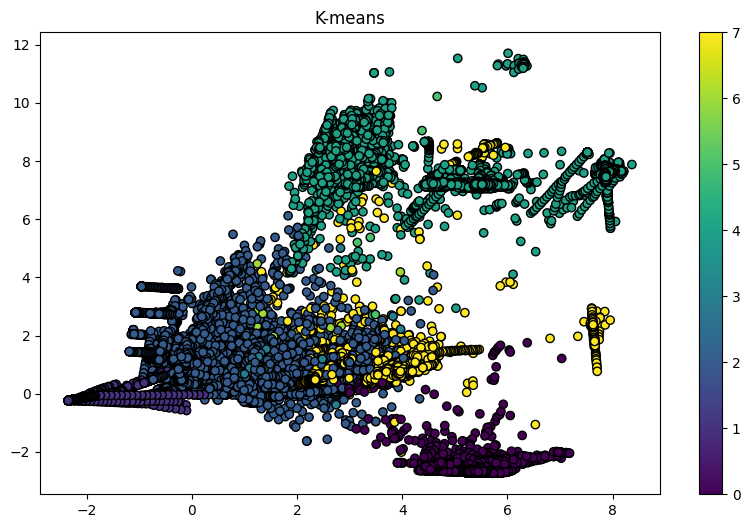

In [ ]:
# Visualizar los resultados usando PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data.drop(["label", "cluster"], axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k')

plt.title('K-means')
plt.colorbar()
plt.show()